In [54]:
import numpy as np
import matplotlib.pyplot as plt
#from numpy.polynomial.polynomial import Polynomial


# Plot Functions

In [55]:
def plot_paths(paths, labels, xlabel='$epoch$', ylabel=r'$\theta$', ndim=2):
    
    markers = ('o', '^', 'd', 's', 'p', 'h', '*', '>', '<', 'v', '+', 'h', 'x')
    
    i = 0
    for path, label in zip(paths,labels):
        if ndim == 2:
            plt.plot(path[:,0], path[:,1], label=label, 
                     marker='.', lw=0.5, markersize=4,) #markers[i]
        elif ndim == 1:
            plt.plot(path[:,0], label=label, 
                     marker='.', lw=0.5, markersize=4,)

        i += 1
    
    plt.xlabel(xlabel, fontsize=17)
    plt.ylabel(ylabel, fontsize=17)
    plt.legend(loc='best')
        

## Defing the appropriate functions

In [56]:
def hypothesis_function(X, theta):
    return X.dot(theta)


def error_function(y_hat, y):
    N = y.shape[0]
    return 1 / N * (y_hat - y).T.dot(y_hat - y)

def cost_function(X, theta, y):
    y_hat = hypothesis_function(X, theta)
    return error_function(y_hat, y)

def quartic_error_function(y_hat, y):
    """
        f(x) = 0.5 \sum_i (x_i^4 - 16x_i^2 + 5x_i)
    """
    N = y.shape[0]
    deltay = y_hat - y
    deltay2 = deltay.T.dot(deltay)
    deltay4 = delta2 ** 2
    
    return 1 / N * 0.5 * (deltay4 - 16*deltay2 + 5*np.sum(deltay))

def quartic_cost_function(X, theta, y):
    y_hat = hypothesis_function(X, theta)
    return quartic_error_function(y_hat, y)

In [57]:
def batch_gradient_descent(X, y, n_epochs=100, eta=0.1):
    
    N, D = X.shape
    K = y.shape[1]
    
    theta_path, J_path = [], []
    
    theta = np.random.randn(D, 1)
    #J = cost_function(X, theta, y)

    for epoch in range(n_epochs):
        y_hat = hypothesis_function(X, theta)
        
        gradients = 2 / N * X.T.dot(y_hat - y)
        theta = theta - eta * gradients
        J = error_function(y_hat, y)
        
        theta_path.append(theta)
        J_path.append(J)

    # end for epoch

    return np.array(theta_path).reshape(-1,D), np.array(J_path).reshape((-1,K))

In [58]:
def stochastic_gradient_descent(X, y, n_epochs=100, eta=0.1):
    
    def learning_schedule(t, t0=5, t1=50):
        return t0 / (t + t1)
    
    N, D = X.shape
    K = y.shape[1]
    
    theta_path, J_path = [], []
    
    theta = np.random.randn(D, 1)

    t = 0
    for epoch in range(n_epochs):
        for i in range(N):
            t += 1
            rand_index = np.random.randint(N)
            xi = X[rand_index:rand_index+1]
            yi = y[rand_index:rand_index+1]

            yi_hat = hypothesis_function(xi, theta)

            gradients = 2 * xi.T.dot(yi_hat - yi)
            eta = learning_schedule(t)
            theta = theta - eta * gradients   
        # end for i
        
           
        J = error_function(yi_hat, yi)
        theta_path.append(theta)
        J_path.append(J)
        
    
    # end for epoch
    
    return np.array(theta_path).reshape(-1,D), np.array(J_path).reshape((-1,K))

In [59]:
def minibatch_gradient_descent(X, y, n_epochs=100, minibatch_size=20):
    
    def learning_schedule(t, t0=5, t1=50):
        return t0 / (t + t1)
    
    N, D = X.shape
    K = y.shape[1]
    
    theta_path, J_path = [], []
    
    theta = np.random.randn(D, 1)

    t = 0
    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(N)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0, N, minibatch_size):
            t += 1

            xi = X_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]

            yi_hat = hypothesis_function(xi, theta)

            gradients = 2 / minibatch_size * xi.T.dot(yi_hat - yi)
            eta = learning_schedule(t)
            theta = theta - eta * gradients
            
        # end for i

        J = error_function(yi_hat, yi)
        theta_path.append(theta)
        J_path.append(J)
        
    # end for epoch
    
    return np.array(theta_path).reshape(-1,D), np.array(J_path).reshape((-1,K))

In [60]:
def functinal_batch_sizeGD(X, y, n_epochs=100, eta=0.1):
    
    def mini_batch_size(epoch, n0=5, p=6):  # this is a piecewise linear function interpolation between the points (ns[i],ts[i])
        
        """
        p:  This is a hyperparameter in the following cosine with exponential envelope temperature profile, it must be a non-negative integer
        n0: This is a hyperparameter fixing the initial mini-batch size
        """
      
        return int(np.ceil(n0 * np.cos(2*p*np.pi*epoch / (n_epochs-1))**2 * np.exp(epoch * np.log(m/(n0*np.cos(2*p*np.pi)**2)) / (n_epochs-1))))

    
    N, D = X.shape
    K = y.shape[1]
    
    theta_path, J_path = [], []
    theta = np.random.randn(D, 1)

    t = 0
    for epoch in range(n_epochs):
        
        minibatch_size = mini_batch_size(epoc)
        
        shuffled_indices = np.random.permutation(N)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0, N, minibatch_size):
            t += 1
            xi = X_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]

            yi_hat = hypothesis_function(xi, theta)

            gradients = 2 / minibatch_size * xi.T.dot(yi_hat - yi)
            theta = theta - eta * gradients
            
        # end for i
        
        J = error_function(yi_hat, yi)
        theta_path.append(theta)
        J_path.append(J)
        
        
    # end for epoch
    
    return np.array(theta_path).reshape(-1,D), np.array(J_path).reshape((-1,K))


# Defing input data

In [61]:
np.random.seed(42)

N = 1000
X = 2 * np.random.rand(N, 1)
y = 4 + 3 * X + np.random.randn(N,1)
X_b = np.c_[np.ones((N, 1)), X]

#plt.plot(X, y, 'b.')

In [62]:
theta_path_bgd, J_path_bgd = batch_gradient_descent(X_b, y)
theta_path_sgd, J_path_sgd = stochastic_gradient_descent(X_b, y)
theta_path_mbg, J_path_mbg = minibatch_gradient_descent(X_b, y)
theta_path_fbsgd, J_path_fbsgd = minibatch_gradient_descent(X_b, y)

Now we plot the whole paths.

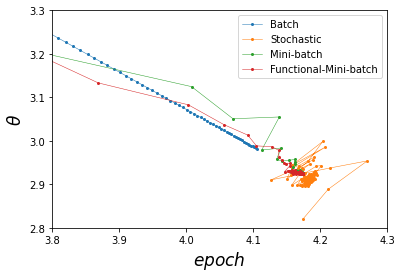

In [63]:
plt.figure(1)
plt.xlim(3.8, 4.3)
plt.ylim(2.8, 3.3)
plot_paths([theta_path_bgd, theta_path_sgd, theta_path_mbg, theta_path_fbsgd], 
         ['Batch', 'Stochastic', 'Mini-batch', 'Functional-Mini-batch'])

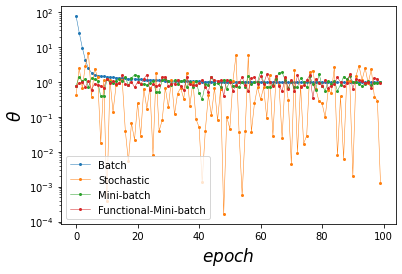

In [64]:
plt.yscale('log')
plot_paths([J_path_bgd, J_path_sgd, J_path_mbg, J_path_fbsgd], 
         ['Batch', 'Stochastic', 'Mini-batch', 'Functional-Mini-batch'], ndim=1)

# The weighted batch size adaptor

In [125]:
def weighted_batch_sizeGD(X, y, n_epochs=100):
    """
    """
    def learning_schedule(t, t0=5., t1=50.):
        return t0 / (t + t1)
    def temperature_schedule(epoch, t0=50., t1=5.):
        return t0 / (epoch + t1)
    
    N, D = X.shape
    K = y.shape[1]
    theta_path, J_path = [], []
    batchsize_path = []
   
    # we choose a random int in this interval [1,N]
    theta = np.random.randn(D, 1)
    J = cost_function(X, theta, y)

    t = 0
    for epoch in range(n_epochs):
        
        shuffled_indices = np.random.permutation(N)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        temperature = 1  #temperature_schedule(epoch)
        
        repeation = 0

        while True:
            repeation += 1

            #batch_size = np.random.randint(1, N + 1)
            batch_size = np.random.geometric(p=10/N)
            if (batch_size > N): batch_size = N

            theta_predict = np.copy(theta)
            J_predict = np.zeros(shape=J.shape)
            count = 0 
            t_predict = t

            for i in range(0, N, batch_size):
                t_predict += 1
                eta = learning_schedule(t_predict)

                xi = X_shuffled[i:i+batch_size]
                yi = y_shuffled[i:i+batch_size]
                yi_hat = hypothesis_function(xi, theta)

                m = len(yi)
                gradients = 2 / m * xi.T.dot(yi_hat - yi)
                theta_predict = theta_predict - eta * gradients
                J_predict = J_predict + error_function(yi_hat, yi)
                count += 1

            # end for i

            J_predict /= count
            deltaJ = J_predict - J
                    
            # now check Boltzman ratio: min{1, exp(-beta*deltaJ)}
            if (deltaJ <= 0) or (np.random.uniform() < np.exp(-deltaJ / temperature)):
                theta = np.copy(theta_predict)
                J = np.copy(J_predict)
                t = t_predict
                break
        # end while

    
        print ('epoch={}, temperature={:.2f}, batch_size={} repeataion={}, J='.\
               format(epoch, temperature, batch_size, 
                      repeation, batch_size), J)
          
        theta_path.append(theta)
        J_path.append(J)
        batchsize_path.append(batch_size) 
        
    # end for epoch
    
    return np.array(theta_path).reshape(-1,D), \
    np.array(J_path).reshape((-1,K)), \
    np.array(batchsize_path).reshape(-1)

In [ ]:
np.random.seed(42)
theta_path_wbsgd, J_path_wbsgd, batchsize_path = weighted_batch_sizeGD(X_b, y)

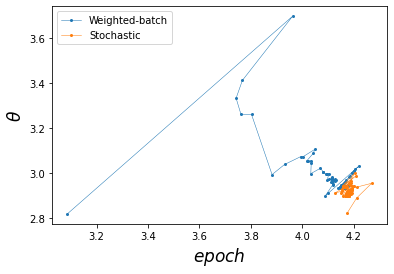

In [117]:
plt.figure(2)
plot_paths([theta_path_wbsgd, theta_path_sgd], 
         ['Weighted-batch', 'Stochastic'])

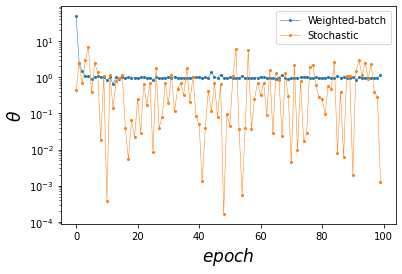

In [118]:
plt.yscale('log')
plot_paths([J_path_wbsgd, J_path_sgd], 
         ['Weighted-batch', 'Stochastic' ], ndim=1)